<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessing_TA/blob/main/exercises/ImageProcessingEx_02_ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

# מטלה 2 - שיפור תמונה

 יש לכתוב בתחילת המחברת את שמות הסטודנטים ומספרי תעודת הזהות בפורמט הבא:

שם פרטי+שם משפחה + ת"ז:

Xxxxx XXXXX, #nnnnnn

<div>



<div dir="rtl">

# שיפור תמונה:

במטלה זו תיישמו אלגוריתמים לשיפור תמונה (Image Enhancement).

**שימו לב**: אין להשתמש בפונקציות מוכנות של עיבוד תמונה
(לדוגמה: convolve או כל פונקציה דומה).
עליכם לממש את החישוב בעצמכם, צעד אחר צעד, לפי ההסבר שניתן בשיעור.

**הנחיות כלליות**:

* המטלה בזוגות, במקרה של בקשות אישיות ניתן לשלוח מייל

* כתבו את הקוד שלכם באזורי ה־TODO (האזורים שסומנו לכך מראש).
ניתן להוסיף פונקציות עזר משלכם אם תרצו.

* העלו את הפתרון ללמדה ע"י  הקישור למחברת ה־Colab שלכם
(ממוקמת ב־Google Drive) עם הרשאת “Commenter” לכתובת ariela7870451@gmail.com

* המחברת צריכה להיראות תקינה ולהיות ניתנת להרצה מלאה ע"י הפקודה
“Run all”  ללא שגיאות.
במקרה של שגיאות, ההגשה תיפסל.


* הציון יינתן לפי:
רמת הביצוע הנכונה של האלגוריתם על מספר תמונות בגווני אפור
וניקיון הקוד (תיעוד, הערות, מבנה קריא).

* אל תשכחו להוסיף את שמותיכם ומספרי תעודת הזהות בראש המחברת.

* כל התמונות הן מטריצות דו־ממדיות מסוג float עם ערכים בטווח [0..1].
* כל הפונקציות  חייבות להחזיר תמונות באותו גודל של התמונות המקוריות!

<div>


## Setup Code

<div dir="rtl">

לפני שמתחילים, יש להריץ כמה פקודות הגדרה בסיסיות (boilerplate code) שמכינות את סביבת העבודה.
יש להריץ קטע קוד זה בכל פעם שפותחים מחדש את המחברת, כדי להבטיח שכל הספריות וההגדרות נטענו כראוי.

<div>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random
from scipy.signal import convolve

In [ ]:
random.seed(3)
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing_TA/main/images/'

In [ ]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Ariela's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
def plot_images(img:np.array, img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 10))
    axes[0].imshow(img,  cmap='gray')
    axes[1].imshow(img1,  cmap='gray')
    axes[2].imshow(img2,  cmap='gray')

In [ ]:
def plot_images(img:np.array, img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 10))
    axes[0].imshow(img,  cmap='gray')
    axes[1].imshow(img1,  cmap='gray')
    axes[2].imshow(img2,  cmap='gray')

In [ ]:
img = read_file(file_name='house.tiff')

## `my_median`

<div dir="rtl">

עליכם לממש פילטר Median בגודל נתון (למשל 3×3, 5×5 וכו׳).

 אסור להשתמש בפונקציה המובנית median() של NumPy.
מותר להשתמש רק ב־sort().

###הפונקציה:

* מקבלת תמונה.

* מחליפה כל פיקסל בחציון של השכונה סביבו.

<div>

In [ ]:
def my_median(img: np.array, filter_nrows:int, filter_ncols:int) -> np.array:
    '''
    This function applies a median filter of size (rows, cols) and returns the
    new image as a result.
   Make sure that you do NOT use the built-in median() function (you have to
   implement it by yourself). You can still use the built-in sort() function.
    Args:
        img: image in float format (range: 0..1) - the image to enhance
        filter_nrows: number of rows of the median filter.
        filter_ncols: number of columns of the median filter.

    Returns:
        img_new: in float format (range: 0..1) - the enhanced image
    '''
    ######################################################################
    # TODO: Implement image enhancement using median filter.
    ######################################################################
    pass

    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

In [ ]:
img_sp = sp_noise(img, d=0.003)
img_sp_e = my_median(img_sp, 3, 3)
plot_images(img/255, img_sp, img_sp_e)

<div dir="rtl">

###התוצאה המבוקשת:

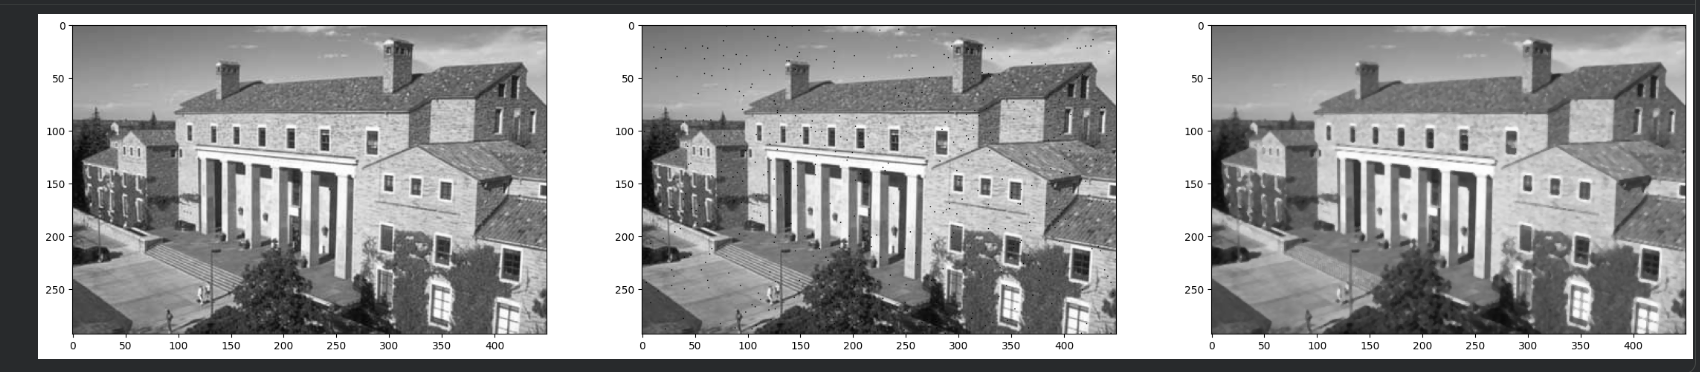

## `gauss_enhance`

<div dir="rtl">

###הפונקציה:

* מקבלת תמונה.

* מוסיפה רעש גאוסי עם: תוחלת = 0, סטיית תקן = 0.004

* לאחר מכן יש לשפר את התמונה באמצעות סינון כיווני (Directional Smoothing) כפי שלמדתם בשיעור.

* יש לבחור את הפילטרים הכיווניים המתאימים: גודל, כיוון, משקלים.

* יש להחזיר 2 תמונות, תמונת המקור עם הרעש (`img_n`) והתמונה המשופרת (`img_e`)


**שימו לב:** המסכות צריכות להיות עם אותו מספר של שורות ועמודות והמספר צריך להיות אי זוגי (לדוגמה 3x3, 5x5, 7x7,...). כדאי להשתמש גם במסכות שונות ממה שהצגנו בכיתה.

<div>

In [ ]:
def gauss_enhance(img: np.array) -> (np.array, np.array):
    '''
    This function receives an image and add gaussian noise to the image with
    mean value 0.0, and var=0.04, and then try to enhance the image using the
    directional smoothing as explained in the class. It is up to you, to choose
    the right directional filters (size, orientation, and values). On the
    docstring of this function you should write which filters does this function
    use.
    note: the masks should have same number of rows and columns and number
    should be odd (ex. 3x3, 5x5, 7x7,...).
    You should use also different masks than what we showed in class.

    Args:
        img: in float format (range: 0..1) - the image to enhance

    Returns:
        img_e: in float format (range: 0..1) - the enhanced image.
        img_n: in float format (range: 0..1) - the noisy image.
    '''
    ######################################################################
    # TODO: Implement image enhancement using Gaussian filter.
    ######################################################################
    pass

    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################
    return img_e, img_n

In [ ]:
img_e, img_n = gauss_enhance(img / 255.0)
plot_images(img/255.0, img_n, img_e)

<div dir="rtl">

###התוצאה המבוקשת:

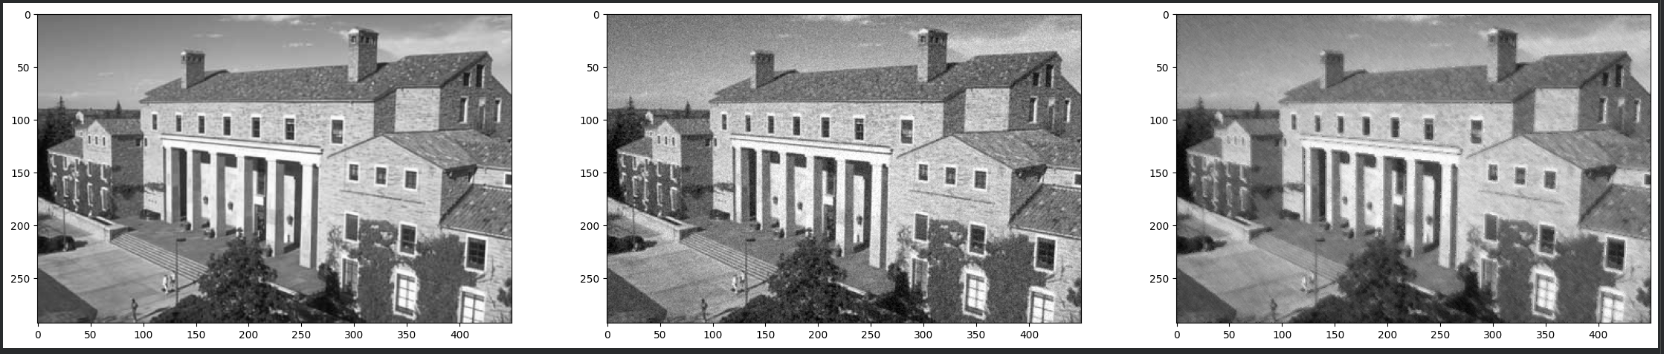

## `shapes_enhance`

<div dir="rtl">

###הפונקציה:

* מקבלת תמונה.

* מוסיפה רעש (0.003) ע"י הפונקציה `sp_noise` בתבנית הזאת :


```python
    1,0,0,0,1
    0,1,0,1,0
    0,0,1,0,0
    0,1,0,1,0
    1,0,0,0,1
```

* משפרת את התמונה באמצעות הפונקציה `my_median` עם מסכה מתאימה (מה המסנן המתאים ביותר?)  

**שימו לב:** יש לבחור את המסנןן הקטן ביותר על מנת להימנע מהחלה מיותרת

<div>

In [ ]:
def shapes_enhance(img: np.array) -> (np.array, np.array):
    '''
    This function receives an image and add shaped noise given by the following
    matrix: [[1,0,0,0,1],
            [0,1,0,1,0],
            [0,0,1,0,0],
            [0,1,0,1,0],
            [1,0,0,0,1]].

    The noise density of the shapes should be 0.003 (used in the `sp_noise` function). The
    function should then try to enhance the image using `my_median` filter (which
    filter works best?). On the docstring of this function you should write the
    dimension of the median filter that this function use (rows X cols).
    Note: The filter shape should be as minimal as possible (to minimize unecessary smoothing)!
    It can be 1-dimensional (ex. 1x5).

    Args:
        img: in float format (range: 0..1) - the image to enhance

    Returns:
        img_e: in float format (range: 0..1) - the enhanced image.
        img_n: in float format (range: 0..1) - the noisy image.
    '''
    ######################################################################
    # TODO: Implement image enhancement using shapes_enhance.
    ######################################################################
    pass

    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################
    return img_e, img_n

In [ ]:
img_e, img_n = shapes_enhance(img/255)
plot_images(img/255, img_n, img_e)

<div dir="rtl">

###התוצאה המבוקשת:

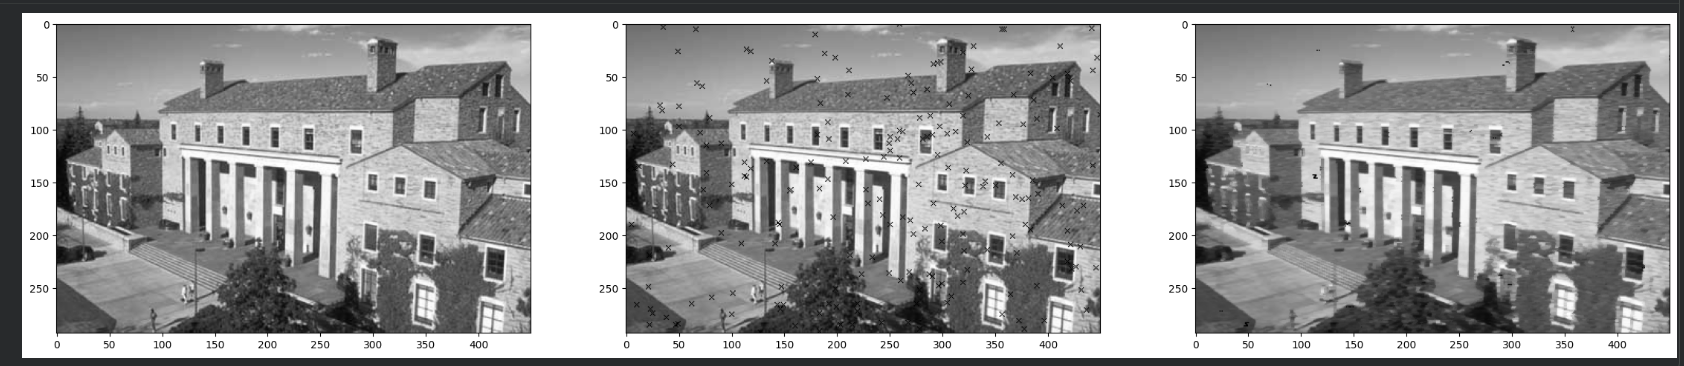